Using the quantum chemestry framework Psi4, I first calculated, using an STO-3G basis with the Hartree-Fock method, the total energies of H<sub>2</sub> and HeH<sup>+</sup> for varying bond lengths.

In [20]:
# ---- Hydrogen molecule file ----
import psi4
import numpy as np


dmin = 0.1 # Angstrom
dmax = 1.5 # Angstrom
pt_density = 500 # Number of points in range

H = psi4.geometry('''
H
H 1 d
''')

print('\# Distance (Angstrom)	Energy (Hartree)')
for r in np.linspace(dmin, dmax, pt_density):
	H.d = r
	E = psi4.energy('scf/sto-3g')
    # Print into ex1-he.out
	#print('{}	{}'.format(r, E))

\# Distance (Angstrom)	Energy (Hartree)


In [21]:
# ---- HeH+ molecule file ----
import numpy as np
import psi4

rmin = 0.1
rmax = 1.5 
pt_density = 300

HeH = psi4.geometry('''
1 1
he
h 1 d
''')

print('\# d (Angstrom)	E (Hartree)')
for r in np.linspace(rmin, rmax, pt_density):
	HeH.d = r
	E = psi4.energy('scf/sto-3g')
	# Print into ex1-heh.out
    #print('{}	{}'.format(r, E))

\# d (Angstrom)	E (Hartree)


500 and 300 points were uniformely sampled for the H<sub>2</sub> and HeH<sup>+</sup> molecules, respectively, for atom bond lengths varying between 0.1Å and 1.5Å.

The obtained results are plotted below:

<IPython.core.display.Javascript object>


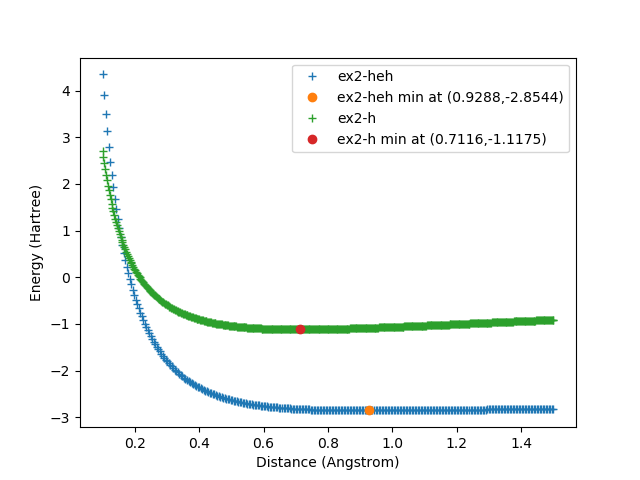

In [13]:
%matplotlib notebook

import matplotlib.pyplot as plt

for file in ('ex2-heh', 'ex2-h'):
    infile = '/home/mike/Desktop/EEMC/Folha1/ex2/PointSearch/' + file + '.out'

    pts = []
    min_val = None

    with open(infile) as infile:
        for line in infile.read().splitlines():
            if line.startswith('#'):
                continue
            x,y = tuple(map(lambda x: float(x), filter(lambda x: x, line.split())))
            pts.append((x,y))

            if min_val is None or y < min_val[1]:
                min_val = (x,y)

    x_pts = tuple(map(lambda x: x[0], pts))
    y_pts = tuple(map(lambda x: x[1], pts))
    plt.plot(x_pts, y_pts, '+', label=file)

    plt.plot(min_val[0], min_val[1], 'o', label='{} min at ({:.4f},{:.4f})'.format(file, min_val[0], min_val[1]))

    plt.xlabel('Distance (Angstrom)')
    plt.ylabel('Energy (Hartree)')
    plt.legend(loc='best')

    #plt.savefig(file + '.png')

    plt.show()


The minimum was also be identified in the same pass, and occurs at (in Angstrom, Hartree)

$$ \text{Min}_{\text{HeH}^+} = \left ( 0.9288 \, , \, -2.8522 \right ) $$

$$ \text{Min}_{\text{H}_2} = \left ( 0.7116 \, , \, -1.1175 \right ) $$

Taking the identified minimums, PSI4 was once again ran with the respective (fixed) minimum energy bond length. The input files and the relevant portion of the output files are presented immediately below.

```python
# ---- Hydrogen ----
# Run with psi4 <file name> -o <output name>

set basis sto-3g

molecule H {
	H
	H 1 0.7116232464929859
}

energy('scf', molecule=H)
# ---- End of File ----
```

```
...
    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1Ag    -0.590501  

    Virtual:                                                              

       1B1u    0.701093  

    Final Occupation by Irrep:
             Ag   B1g   B2g   B3g    Au   B1u   B2u   B3u 
    DOCC [     1,    0,    0,    0,    0,    0,    0,    0 ]
...
```

```python
# ---- HeH+ ----
# Run with psi4 <file name> -o <output name>

import numpy as np

molecule HeH {
	1 1
	he
	h 1 0.92876254180602 
}

set basis sto-3g

energy('hf', molecule=HeH)

# ---- End of File
```

```
...
    Orbital Energies [Eh]
    ---------------------

    Doubly Occupied:                                                      

       1A1    -1.524298  

    Virtual:                                                              

       2A1    -0.267229  

    Final Occupation by Irrep:
             A1    A2    B1    B2 
    DOCC [     1,    0,    0,    0 ]
...
```

The output data, therefore, indicates that the HOMO and LUMO energy for both species are

* H<sub>2</sub>:

$$ \epsilon_\text{HOMO} = -0.590501 \quad \text{(Hartree)} $$

$$ \
